## Plot for 3D scan: $gm_4$, $|U_{e4}|^2$, $|U_{\mu4}^2|$

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

import MicroTools as micro
import MicroTools.plot_tools as pt

## Load data and parameter space

In [4]:
# 3D parameter scan
filename = "App_gm4_Ue4sq_Um4sq_v1"
path_results = "fit_data/"
#data = np.load(f"{path_results}/App_gm4_Ue4sq_Um4sq_.npy", allow_pickle=True)
data = np.load(f"{path_results}/" + filename + ".npy", allow_pickle=True)
#gm4VecT, EVec, MVec = data[:,0], data[:,1], data[:,2]

MiniApp_chi2 = data[:,-3]
MicroApp_chi2 = data[:,-2]
MicroApp_Asimov_chi2 = data[:,-1]
Npoints = 15
def marg(chi2, which_axis):
    chi2_rs = np.reshape(chi2, (Npoints, Npoints, Npoints))
    min_chi2 = np.min(chi2_rs, axis = which_axis)
    min_chi2 = np.ravel(min_chi2)
    delta_chi2 = min_chi2 - np.min(min_chi2)
    return delta_chi2

# Necessary for marginalization because parameters need to have the same dimension as chi2
# Range of gm4 for sterile decay model scanned over 0.1 to 100
gm = np.geomspace(1e-1, 1e3, Npoints)

# Range of |U_{e4}|^2 scanned over 1e-4 to 1
e = np.geomspace(1e-4, 0.49, Npoints)

# Range of |U_{\mu4}|^2 scanned over 1e-4 to 1
mu = np.geomspace(1e-4, 0.49, Npoints)

## Marginalize over $|U_{e4}|^2$

<ipython-input-17-d983bb83e8ee>:46: UserWarning: linewidths is ignored by contourf
  ax.tricontourf(MVec, gm4VecT, MicroApp_deltachi2, levels=levsMicroB, cmap='Blues', alpha=1, linewidths=1.5)
No handles with labels found to put in legend.


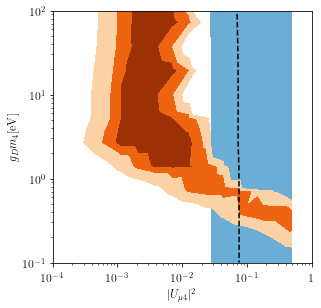

In [17]:
gm4VecT, MVec = np.meshgrid(gm,mu)
gm4VecT, MVec = np.ravel(gm4VecT), np.ravel(MVec)

def margT(chi2, which_axis):
    chi2_rs = np.reshape(chi2, (Npoints, Npoints, Npoints))
    min_chi2 = np.min(chi2_rs, axis = which_axis)
    min_chi2 = min_chi2.T
    min_chi2 = np.ravel(min_chi2)
    return min_chi2

# marg over e
MiniApp_deltachi2 = marg(MiniApp_chi2,which_axis = 1)
MicroApp_deltachi2 = marg(MicroApp_chi2,which_axis = 1)
MicroApp_Asimov_deltachi2 = marg(MicroApp_Asimov_chi2,which_axis = 1)

# De Gouvea fit
MB = np.loadtxt(f'MicroTools/MB_data/DeGouvea_data/miniboone_2sigma.dat')
MBX = 10**MB[:,0]
MBY = 10**MB[:,1]
MBlower = np.loadtxt(f'MicroTools/MB_data/DeGouvea_data/miniboone_2sigma_lower.dat')
MBupper = np.loadtxt(f'MicroTools/MB_data/DeGouvea_data/miniboone_2sigma_upper.dat')
MBc = np.vstack((MBlower,MBupper))
MB = np.loadtxt('MicroTools/MB_data/DeGouvea_data/miniboone_2sigma.dat')
MBX = 10**MB[:,0]
MBY = 10**MB[:,1]

fig, ax = pt.std_fig(figsize=(pt.std_figsize[0], pt.std_figsize[1]*1.5))
xmin, xmax, ymin, ymax = 1e-4, 1, 1e-1, 1e2
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_ylabel(r'$g_D m_4 [\mathrm{eV}]$', fontproperties=pt.font)        
ax.set_xticks([1e-4, 1e-3, 1e-2, 1e-1, 1])
#ax.set_yticks([1e-1, 1, 10, 100])
[l.set_size(pt.labelfont.get_size()) for l in ax.get_xticklabels()]
#[l.set_size(pt.labelfont.get_size()) for l in ax.get_yticklabels()]
[l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]
#ax.set_yticklabels((r"$10^{-1}$", r"$1$", r"$10$", r"$10^2$"), fontproperties=pt.labelfont)
ax.set_xticklabels((r"$10^{-4}$", r"$10^{-3}$", r"$10^{-2}$", r"$10^{-1}$", r"$1$"), fontproperties=pt.labelfont)
ax.set_xlabel(r"$|U_{\mu 4}|^2$", fontproperties=pt.font)


levs0MB = np.min(MicroApp_chi2)
levsMiniB = [0, 2.30, 6.18, 11.83]
levsMicroB = [6.18, 1e10]
ax.tricontourf(MVec, gm4VecT, MicroApp_deltachi2, levels=levsMicroB, cmap='Blues', alpha=1, linewidths=1.5)
ax.tricontour(MVec, gm4VecT, MicroApp_Asimov_deltachi2, levels=levsMicroB, colors=['black'], alpha=1, linewidths=1.5, linestyles=['--'])
ax.tricontourf(MVec, gm4VecT, MiniApp_deltachi2, levels=levsMiniB, cmap='Oranges_r', alpha=1)

#fleft = interp1d(10**MBupper[:,1], 10**MBupper[:,0], bounds_error=False, fill_value='extrapolate')
#fright = interp1d(10**MBlower[:,1], 10**MBlower[:,0], bounds_error=False, fill_value='extrapolate')
#y = np.geomspace(np.min([10**MBupper[:,1].min(), 10**MBlower[:,1].min()]), np.max([10**MBupper[:,1].max(), 10**MBlower[:,1].max()]))
#ax.fill_betweenx(y, fleft(y), fright(y), edgecolor='black', hatch='////', facecolor='None', alpha=0.5, label='deGouvea MB $2\sigma$')

ax.legend(loc = 'lower left', fontsize = 10)

fig.savefig(f"{micro.path_plots}/" + filename + ".pdf", bbox_inches='tight')

## Marginalize over $|U_{\mu4}|^2$

<ipython-input-60-17c6cef40561>:54: UserWarning: linewidths is ignored by contourf
  ax.tricontourf(EVec, MVec, MicroApp_deltachi2, levels=levsMicroB, cmap='Blues', alpha=1, linewidths=1.5)
<ipython-input-60-17c6cef40561>:55: UserWarning: No contour levels were found within the data range.
  ax.tricontour(EVec, MVec, MicroApp_Asimov_deltachi2, levels=levsMicroB, colors=['black'], alpha=1, linewidths=1.5, linestyles=['--'])


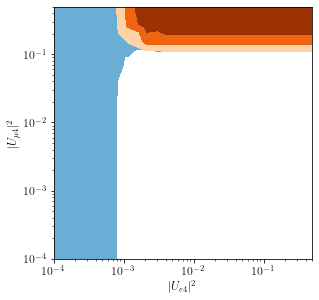

In [60]:
MVec, EVec = np.meshgrid(mu,e)
MVec, EVec = np.ravel(MVec), np.ravel(EVec)

# marg over gm
MiniApp_deltachi2 = marg(MiniApp_chi2,which_axis = 0)
MicroApp_deltachi2 = marg(MicroApp_chi2,which_axis = 0)
MicroApp_Asimov_deltachi2 = marg(MicroApp_Asimov_chi2,which_axis = 0)

fig, ax = pt.std_fig(figsize=(pt.std_figsize[0], pt.std_figsize[1]*1.5))
xmin, xmax, ymin, ymax = 1e-4, 0.5, 1e-4, 0.5
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_ylabel(r'$|U_{\mu 4}|^2$', fontproperties=pt.font)        
#ax.set_xticks([1e-4, 1e-3, 1e-2, 1e-1, 1])
#ax.set_yticks([1e-1, 1, 10, 100])
#[l.set_size(pt.labelfont.get_size()) for l in ax.get_xticklabels()]
#[l.set_size(pt.labelfont.get_size()) for l in ax.get_yticklabels()]
#[l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]
#ax.set_yticklabels((r"$10^{-1}$", r"$1$", r"$10$", r"$10^2$"), fontproperties=pt.labelfont)
#ax.set_xticklabels((r"$10^{-4}$", r"$10^{-3}$", r"$10^{-2}$", r"$10^{-1}$", r"$1$"), fontproperties=pt.labelfont)
ax.set_xlabel(r"$|U_{e 4}|^2$", fontproperties=pt.font)


levs0MB = np.min(MicroApp_chi2)
levsMiniB = [0, 2.30, 6.18, 11.83]
levsMicroB = [6.18, 1e10]
ax.tricontourf(EVec, MVec, MicroApp_deltachi2, levels=levsMicroB, cmap='Blues', alpha=1, linewidths=1.5)
ax.tricontour(EVec, MVec, MicroApp_Asimov_deltachi2, levels=levsMicroB, colors=['black'], alpha=1, linewidths=1.5, linestyles=['--'])
ax.tricontourf(EVec, MVec, MiniApp_deltachi2, levels=levsMiniB, cmap='Oranges_r', alpha=1)

fig.savefig(f"{micro.path_plots}/Marg_gm4_v4.pdf", bbox_inches='tight')

## Marginalize over $gm_4$

<ipython-input-33-b39e89d18a97>:20: UserWarning: linewidths is ignored by contourf
  ax.tricontourf(EVec, MVec, MicroApp_deltachi2, levels=levsMicroB, cmap='Blues', alpha=1, linewidths=1.5)
No handles with labels found to put in legend.


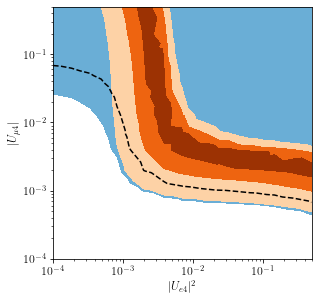

In [33]:
EVec, MVec = np.meshgrid(e,mu)
EVec, MVec = np.ravel(EVec), np.ravel(MVec)

# marg over gm4
MiniApp_deltachi2 = marg(MiniApp_chi2,which_axis = 2)
MicroApp_deltachi2 = marg(MicroApp_chi2,which_axis = 2)
MicroApp_Asimov_deltachi2 = marg(MicroApp_Asimov_chi2,which_axis = 2)

fig, ax = pt.std_fig(figsize=(pt.std_figsize[0], pt.std_figsize[1]*1.5))
xmin, xmax, ymin, ymax = 1e-4, 5e-1, 1e-4, 5e-1
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_ylabel(r'$|U_{\mu 4}|$', fontproperties=pt.font)        
ax.set_xlabel(r"$|U_{e 4}|^2$", fontproperties=pt.font)

levs0MB = np.min(MicroApp_chi2)
levsMiniB = [0, 2.30, 6.18, 11.83]
levsMicroB = [6.18, 1e10]
ax.tricontourf(EVec, MVec, MicroApp_deltachi2, levels=levsMicroB, cmap='Blues', alpha=1, linewidths=1.5)
ax.tricontour(EVec, MVec, MicroApp_Asimov_deltachi2, levels=levsMicroB, colors=['black'], alpha=1, linewidths=1.5, linestyles=['--'])
ax.tricontourf(EVec, MVec, MiniApp_deltachi2, levels=levsMiniB, cmap='Oranges_r', alpha=1)

ax.legend(loc = 'lower left', fontsize = 10)

#fig.savefig(f"{micro.path_plots}/" + filename + ".pdf", bbox_inches='tight')